In [1]:
# pip install statsmodels

In [2]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
from matplotlib import pyplot as plt

In [3]:
ces = pd.read_csv('cces_example_data.csv')
reddit = pd.read_csv('reddit_data_example.csv')

In [4]:
ces.shape, reddit.shape

((659, 21), (8137, 12))

In [5]:
ces.columns

Index(['pew_religimp', 'pew_churatd', 'sex', 'educ', 'nonwhite', 'age',
       'faminc_new', 'pid3', 'ideo5', 'QueerPhobia', 'ImmiPhobia',
       'InterGBiasParty', 'InterGBiasCand', 'InterGBiasSup', 'LibMediaUse',
       'ConMediaUse', 'Real_Threat', 'Symb_Threat', 'Evaluation', 'teamweight',
       'caseid'],
      dtype='object')

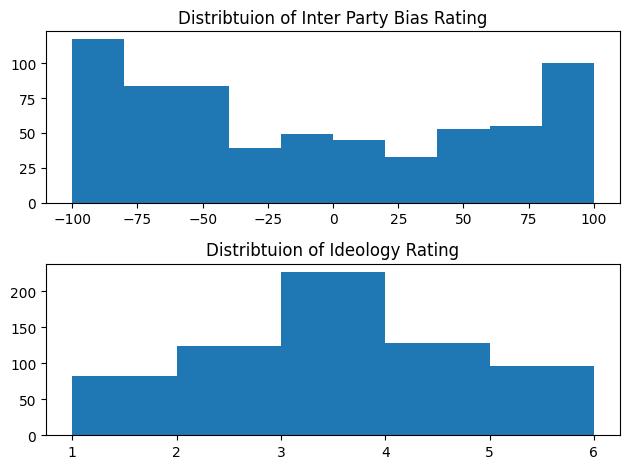

In [6]:
fig1, ax1 = plt.subplots(2)
ax1[0].hist(ces['InterGBiasParty'])
ax1[0].set_title('Distribtuion of Inter Party Bias Rating')
ax1[1].hist(ces['ideo5'], bins = 5)
ax1[1].set_title('Distribtuion of Ideology Rating')
plt.tight_layout()
plt.show()

In [7]:
ces[['InterGBiasParty', 'ideo5']].dtypes

InterGBiasParty    int64
ideo5              int64
dtype: object

In [8]:
ces['ideo5'].describe()

count    659.000000
mean       3.083460
std        1.282575
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: ideo5, dtype: float64

In [9]:
ces['ideo5_0'] = ces['ideo5']-1

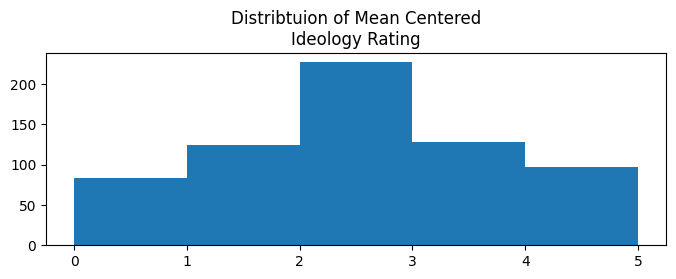

In [10]:
fig2, ax2 = plt.subplots(figsize=(8, 2.5))
ax2.hist(ces['ideo5_0'], bins = 5)
ax2.set_title('Distribtuion of Mean Centered\nIdeology Rating')
plt.show()

In [11]:
model1 = sm.ols('InterGBiasParty ~ ideo5_0', data = ces)
results1 = model1.fit()

In [12]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        InterGBiasParty   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     358.6
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           3.85e-64
Time:                        15:58:50   Log-Likelihood:                -3555.7
No. Observations:                 659   AIC:                             7115.
Df Residuals:                     657   BIC:                             7124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -72.8975      3.972    -18.355      0.0

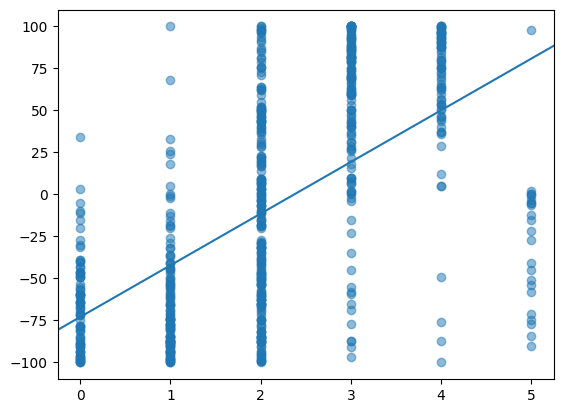

In [13]:
fig3, ax3 = plt.subplots()
ax3.scatter(ces['ideo5_0'], ces['InterGBiasParty'], alpha = .5)
ax3.axline((0,-72.8975), slope = 30.7447)
plt.show()

In [14]:
ces['sex'].head()

0    2
1    2
2    1
3    1
4    2
Name: sex, dtype: int64

In [15]:
ces['sex'].dtype

dtype('int64')

In [16]:
ces['sex_c'] = ces['sex'].astype('category')
ces['sex_c'].dtype

CategoricalDtype(categories=[1, 2], ordered=False, categories_dtype=int64)

In [17]:
model2 = sm.ols('InterGBiasParty ~ ideo5_0 + sex_c', data = ces)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        InterGBiasParty   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     183.7
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           4.39e-64
Time:                        15:58:50   Log-Likelihood:                -3552.6
No. Observations:                 659   AIC:                             7111.
Df Residuals:                     656   BIC:                             7125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.8009      4.662    -14.328      0.0

In [18]:
model3 = sm.ols('InterGBiasParty ~ ideo5_0*sex_c', data = ces)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:        InterGBiasParty   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     126.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.28e-64
Time:                        15:58:50   Log-Likelihood:                -3548.6
No. Observations:                 659   AIC:                             7105.
Df Residuals:                     655   BIC:                             7123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -79.5899      6

In [19]:
from statsmodels.graphics.factorplots import interaction_plot

In [20]:
coef = results3.params
coef

Intercept            -79.589911
sex_c[T.2]             9.533750
ideo5_0               36.575926
ideo5_0:sex_c[T.2]    -9.447475
dtype: float64

In [21]:
ideo_desc = ces['ideo5_0'].describe()
ideo_desc

count    659.000000
mean       2.083460
std        1.282575
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: ideo5_0, dtype: float64

In [22]:
ideo_mean = ideo_desc['mean']

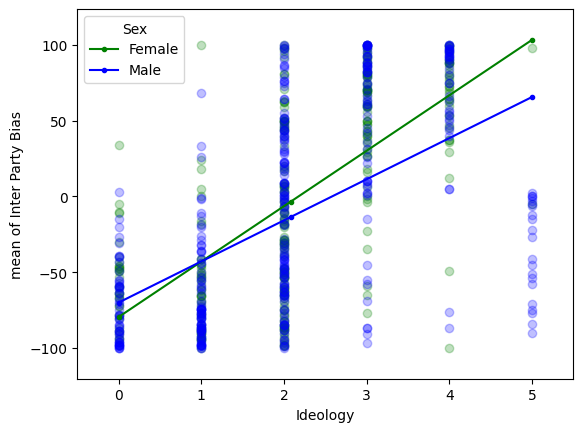

In [23]:
coef = results3.params
flow_ideo_pred = coef['Intercept'] + 0*coef['ideo5_0']
fmid_ideo_pred = coef['Intercept'] + ideo_mean*coef['ideo5_0']
fhigh_ideo_pred = coef['Intercept'] + 5*coef['ideo5_0']

mlow_ideo_pred = coef['Intercept'] + 0*coef['ideo5_0'] + coef['sex_c[T.2]'] + 0*coef['ideo5_0:sex_c[T.2]']
mmid_ideo_pred = coef['Intercept'] + ideo_mean*coef['ideo5_0'] + coef['sex_c[T.2]'] + ideo_mean*coef['ideo5_0:sex_c[T.2]']
mhigh_ideo_pred = coef['Intercept'] + 5*coef['ideo5_0'] + coef['sex_c[T.2]'] + 5*coef['ideo5_0:sex_c[T.2]']

pred_bias = [flow_ideo_pred, fmid_ideo_pred, fhigh_ideo_pred, mlow_ideo_pred, mmid_ideo_pred, mhigh_ideo_pred]

x_ideo = [0, ideo_mean, 5]*2
m_sex = ['Female', 'Female', 'Female', 'Male', 'Male', 'Male']

fig4, ax4 = plt.subplots()
fig4 = interaction_plot(
    x = x_ideo,
    trace = m_sex,
    response = pred_bias,
    colors = ['green', 'blue'],
    ax = ax4,
    ylabel = 'Inter Party Bias',
    xlabel = 'Ideology',
    legendtitle = 'Sex')
ax4.scatter(ces[ces['sex_c'] == 1]['ideo5_0'], ces[ces['sex_c'] == 1]['InterGBiasParty'], alpha = .25, color = 'green')
ax4.scatter(ces[ces['sex_c'] == 2]['ideo5_0'], ces[ces['sex_c'] == 2]['InterGBiasParty'], alpha = .25, color = 'blue')
plt.show()